# Natural Computing - Assignment 5 - Ensemble Learning
## Exercise 3
#### Submission by group 25 (Chihab Amghane, Max Driessen, Jordy Naus)

This file contains our code for exercise 3 of the "Ensemble Learning" assignment of the Natural Computing course.

### Imports

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Exercise 2a: Probability of correct majority vote without weights

In [2]:
def P_cmvTwoTypes(p_strong, p_weak):    
    # Compute P_cmv by looking at two cases: 
    p_cmv = 0
    
    ## Case 1: strong classifier is correct
    for i in range(6):
        p_cmv += p_strong * p_weak**(10-i) * (1-p_weak)**i * math.comb(10,i)
    
    ## Case 2: strong classifier is incorrect
    for i in range(5):
        p_cmv += (1-p_strong) * p_weak**(10-i) * (1-p_weak)**(i) * math.comb(10,i)
    
    # Return the calculated value
    return p_cmv  

In [3]:
print(f"Probability of correct majority vote without weights: {P_cmvTwoTypes(0.75, 0.6)}")

Probability of correct majority vote without weights: 0.7835968511999999


### Exercise 2b: Probabilities of correct majority vote with different weights

In [4]:
def P_cmvTwoTypesWeighted(p_strong, p_weak, w_strong=1):
    # Round weight up to nearest integer (makes computation easier later on; does not change outcome)
    w_strong = math.ceil(w_strong)
    
    # Compute "total weight" of all classifiers combined
    n = w_strong + 10
    
    # Compute P_cmv by looking at two cases: 
    p_cmv = 0
    
    ## Case 1: strong classifier is correct
    for i in range(math.floor(n/2) + 1):
        p_cmv += p_strong * p_weak**(10-i) * (1-p_weak)**i * math.comb(10,i)
    
    ## Case 2: strong classifier is incorrect
    for i in range(math.floor(n/2) - w_strong + 1):
        p_cmv += (1-p_strong) * p_weak**(10-i) * (1-p_weak)**(i) * math.comb(10,i)
        
    # Correct for even values of total_weight
    if not n%2:
        p_cmv -= 0.5 * p_strong * p_weak**(n/2 - w_strong) * (1-p_weak)**(n/2) * math.comb(10,n//2)
        p_cmv -= 0.5 * (1-p_strong) * p_weak**(n/2) * (1-p_weak)**(n/2 - w_strong) * math.comb(10,n//2)
    
    # Return the calculated value
    return p_cmv    

In [5]:
def plotP_cmvWeights(p_strong, p_weak, max_weight, ints_only=False):
    # Set size of the plot
    plt.figure(figsize=(8,5))
    
    # Compute and plot the P_cmv values for each weight
    step = 1 if ints_only else 0.01 # Correction for when only integers are used
    p_cmv_values = [P_cmvTwoTypesWeighted(p_strong, p_weak, w) for w in np.arange(0,max_weight+0.0001,step)]
    plt.plot(np.arange(0,max_weight+0.0001,step), p_cmv_values)
    
    # Prettify the plot
    plt.xlabel("strong classifier weight")
    plt.ylabel("P_cmv")
    plt.title(f"P_cmv as a function of strong classifier weight{' (integer weights only)' if ints_only else ''}")
    plt.xticks(np.arange(0,max_weight+1))
    plt.grid()
    
    # Show the result
    plt.show()

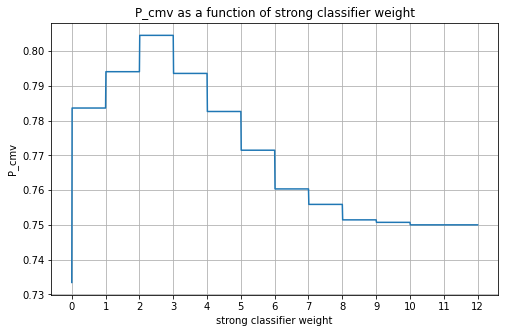

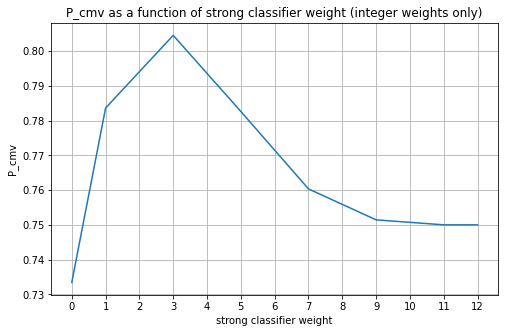

In [6]:
plotP_cmvWeights(0.75, 0.6, 12)
plotP_cmvWeights(0.75, 0.6, 12, True)

### Exercise 3c: AdaBoost weights of strong and weak classifier

In [7]:
def getAdaBoostWeight(err):
    alpha = np.log((1-err)/err)
    return alpha

In [8]:
strong_weight = getAdaBoostWeight(1-0.75)
weak_weight = getAdaBoostWeight(1-0.6)
print(f"AdaBoost weight for strong classifier: {strong_weight}")
print(f"AdaBoost weight for weak classifier: {weak_weight}")
print(f"Proportion strong weight/weak weight: {strong_weight/weak_weight}")

AdaBoost weight for strong classifier: 1.0986122886681098
AdaBoost weight for weak classifier: 0.4054651081081642
Proportion strong weight/weak weight: 2.7095112913514563


### Exercise 3d: AdaBoost weights as a function of error

In [9]:
def plotAdaBoostWeights():
    # Set size of the plot
    plt.figure(figsize=(8,5))
    
    # Compute and plot AdaBoost weights as a function of error
    errors = np.arange(0.01,1,0.01)
    weights = [getAdaBoostWeight(err) for err in errors]
    plt.plot(errors, weights)
    
    # Prettify the plot
    plt.xlabel("expected error")
    plt.ylabel("AdaBoost weight")
    plt.title("AdaBoost weights as a function of expected classifier error")
    plt.xticks(np.arange(0,1.1,0.1))
    plt.grid()
    
    # Show the result
    plt.show()

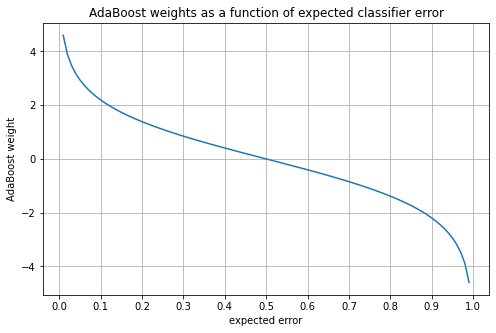

In [10]:
plotAdaBoostWeights()